# Batch SequenceInference

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '..')

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
plt.ioff()

from src.util import progress
from src.util.feature_cache import MemoryFeatureCache
from src import models

# Sequences to infer reactivities for
SEQUENCES = ['GGGGAAAACCCC', 'GGGGGAAACCCC', 'UAUAAAAAUAUA', 'CCUAGAAAUAGG']
# Whenever an input feature (eg, MFE or BPPs from conventional models) is computed,
# cache it in memory so it can be reused in other models. If you want to preserve this
# cache between runs, you can use an FSFeatureCache instead, which will store the
# data in an hdf5 file using a specified gzip compression level
cache = MemoryFeatureCache()

In [2]:
def plot_reactivities(name: str, inference: pd.DataFrame):
    fig, axs = plt.subplots(1, 2, figsize=(min(max([len(seq) for seq in SEQUENCES])/2, 16), len(SEQUENCES) / 3))
    norm = Normalize(0, 1)

    rdms = []
    i = 0
    for seq in SEQUENCES:
        rdms.append(inference['reactivity_DMS_MaP'][i:i + len(seq)])
        i += len(seq)
    axs[0].imshow(rdms, norm=norm, cmap='gist_heat_r', aspect='auto')
    axs[0].locator_params(steps=[1, 5, 10], integer=True)
    axs[0].set_yticks([])
    axs[0].set_title(f'{name}_dms')
    del rdms

    r2a3 = []
    i = 0
    for seq in SEQUENCES:
        r2a3.append(inference['reactivity_DMS_MaP'][i:i + len(seq)])
        i += len(seq)
    axs[1].imshow(r2a3, norm=norm, cmap='gist_heat_r', aspect='auto')
    axs[1].locator_params(steps=[1, 5, 10], integer=True)
    axs[1].set_yticks([])
    axs[1].set_title(f'{name}_2a3')
    del r2a3

    fig.colorbar(ScalarMappable(norm=norm, cmap='gist_heat_r'), orientation='horizontal', label='Predicted Reactivity', ax=axs, shrink=0.6, pad=0.075 * (6/len(SEQUENCES)))

    display(fig)

VBox()

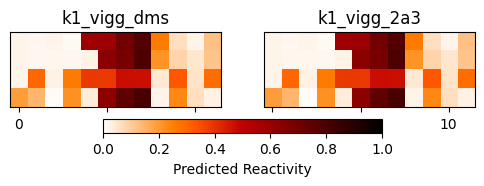

VBox()

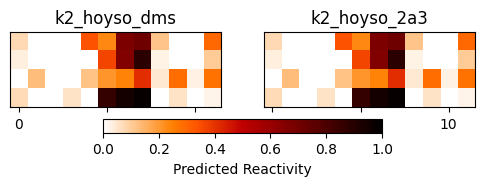

VBox()

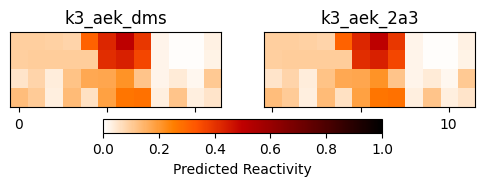

VBox()

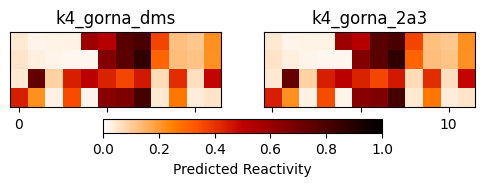

VBox()

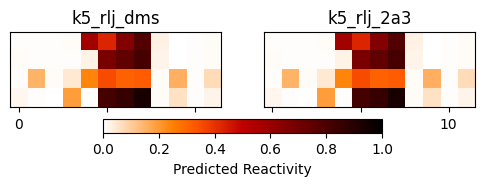

VBox()

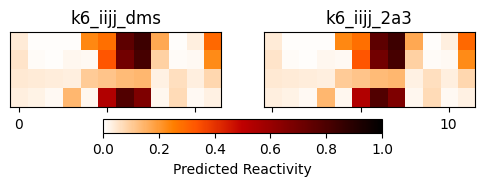

In [3]:
with cache, progress.NotebookProgress():
    plot_reactivities('k1_vigg', models.k1_vigg.infer(SEQUENCES))
    plot_reactivities('k2_hoyso', models.k2_hoyso.infer(SEQUENCES))
    plot_reactivities('k3_aek', models.k3_aek.infer(SEQUENCES))
    plot_reactivities('k4_gorna', models.k4_gorna.infer(SEQUENCES))
    plot_reactivities('k5_rlj', models.k5_rlj.infer(SEQUENCES))
    plot_reactivities('k6_iijj', models.k6_iijj.infer(SEQUENCES))